In [1]:
import numpy as np
import os
from glob import iglob
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from data_extraction import *

In [ ]:
def timestamp_to_seconds(t):
    return sum(float(n) * m for n, m in zip(reversed(t), (1, 60, 3600)))

[19250. 14250.  9250.  4250.   250.]
[20750. 15750. 10750.  5750.  1750.]


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

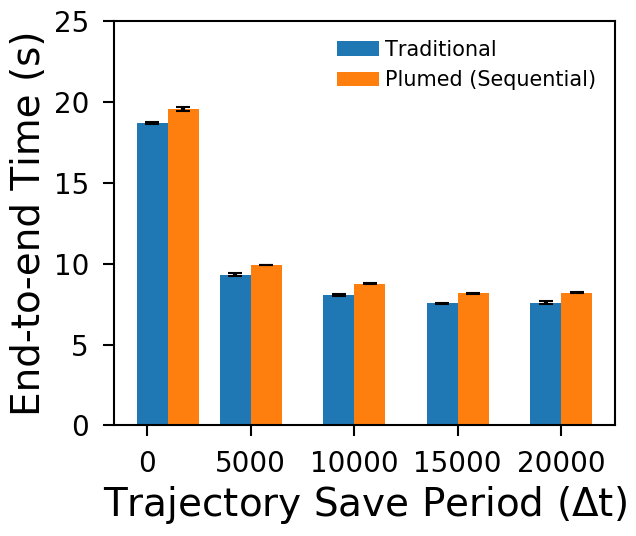

In [9]:
# This will return absolute paths
paths = {'sequential':'Traditional','sequential_in_transit':'Plumed (Sequential)'}
for index, (path,legend) in enumerate(paths.items()):
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    a_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        L=get_L(log_file)
        N=get_N(log_file)
        dump_interval = get_dump_interval(log_file)
        
        analysis_time=get_analysis_time(log_file,legend)
        total_time=get_total_time(log_file)
        sim_time=get_sim_time(log_file,legend)
        
        total_times[dump_interval].append(total_time)
        a_time_dict[dump_interval].append(analysis_time)
        sim_time_dict[dump_interval].append(sim_time)

    #print(total_times)
    bar_width=1500
    mean_tts = [np.mean(total_time_vals) for dump_interval, total_time_vals in total_times.items()]
    std_tts = [stats.sem(total_time_vals) for dump_interval, total_time_vals in total_times.items()]
    dump_intervals = total_times.keys()
    x_vals = (np.array(list(dump_intervals)))
    if index==0:
        x_vals = x_vals-(bar_width/2)
    else:
        x_vals = x_vals+(bar_width/2)
    print(x_vals)
    plt.bar(x_vals,
            mean_tts,
            yerr=std_tts, 
            align='center', alpha=1.0, ecolor='black', capsize=5, width=bar_width,
            label=legend)
    
    
plt.xlabel("Trajectory Save Period ($\Delta$t)")
plt.ylabel("End-to-end Time (s)")
plt.legend(fontsize=15)
plt.ylim(0,25)
#plt.xlim(10,65)
plt.savefig('ete_time_bar_vary_dt.png', transparent=True)
plt.show()

[19250. 14250.  9250.  4250.   250.]
[20750. 15750. 10750.  5750.  1750.]


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

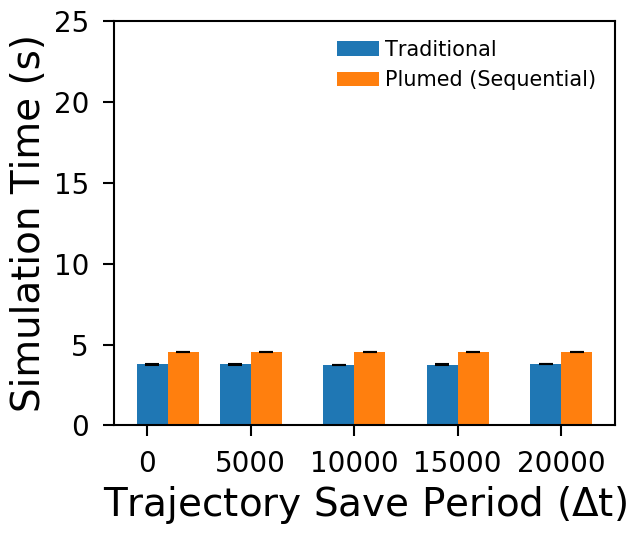

In [10]:
# This will return absolute paths
paths = {'sequential':'Traditional','sequential_in_transit':'Plumed (Sequential)'}
for index, (path,legend) in enumerate(paths.items()):
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    a_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        L=get_L(log_file)
        N=get_N(log_file)
        dump_interval = get_dump_interval(log_file)
        
        analysis_time=get_analysis_time(log_file,legend)
        total_time=get_total_time(log_file)
        sim_time=get_sim_time(log_file,legend)
        
        total_times[dump_interval].append(total_time)
        a_time_dict[dump_interval].append(analysis_time)
        sim_time_dict[dump_interval].append(sim_time)

    #print(total_times)
    bar_width=1500
    mean_tts = [np.mean(total_time_vals) for dump_interval, total_time_vals in sim_time_dict.items()]
    std_tts = [stats.sem(total_time_vals) for dump_interval, total_time_vals in sim_time_dict.items()]
    dump_intervals = total_times.keys()
    x_vals = (np.array(list(dump_intervals)))
    if index==0:
        x_vals = x_vals-(bar_width/2)
    else:
        x_vals = x_vals+(bar_width/2)
    print(x_vals)
    plt.bar(x_vals,
            mean_tts,
            yerr=std_tts, 
            align='center', alpha=1.0, ecolor='black', capsize=5, width=bar_width,
            label=legend)
    
    
plt.xlabel("Trajectory Save Period ($\Delta$t)")
plt.ylabel("Simulation Time (s)")
plt.legend(fontsize=15)
plt.ylim(0,25)
#plt.xlim(10,65)
plt.savefig('sim_time_bar_vary_dt.png', transparent=True)
plt.show()

[19250. 14250.  9250.  4250.   250.]
[20750. 15750. 10750.  5750.  1750.]


/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

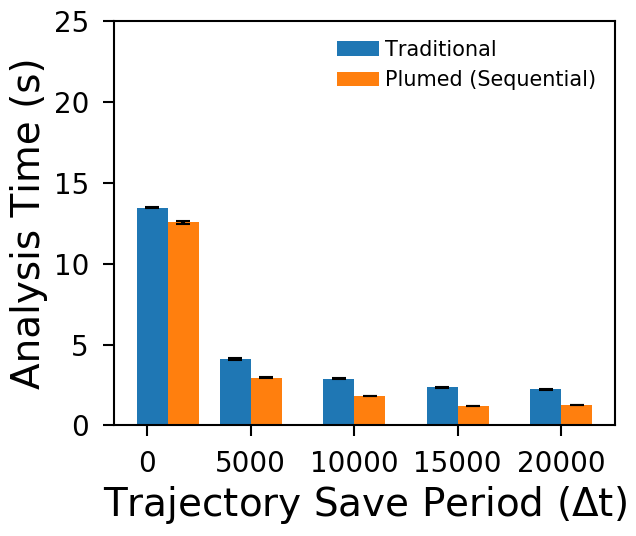

In [11]:
# This will return absolute paths
paths = {'sequential':'Traditional','sequential_in_transit':'Plumed (Sequential)'}
for index, (path,legend) in enumerate(paths.items()):
    total_times = defaultdict(list)
    sim_time_dict = defaultdict(list)
    a_time_dict = defaultdict(list)
    log_files = [os.path.abspath(f) for f in iglob('{}/slurm*'.format(path), recursive=True)]
    for log_file in log_files:
        #print(log_file)
        L=get_L(log_file)
        N=get_N(log_file)
        dump_interval = get_dump_interval(log_file)
        
        analysis_time=get_analysis_time(log_file,legend)
        total_time=get_total_time(log_file)
        sim_time=get_sim_time(log_file,legend)
        
        total_times[dump_interval].append(total_time)
        a_time_dict[dump_interval].append(analysis_time)
        sim_time_dict[dump_interval].append(sim_time)

    #print(total_times)
    bar_width=1500
    mean_tts = [np.mean(total_time_vals) for dump_interval, total_time_vals in a_time_dict.items()]
    std_tts = [stats.sem(total_time_vals) for dump_interval, total_time_vals in a_time_dict.items()]
    dump_intervals = total_times.keys()
    x_vals = (np.array(list(dump_intervals)))
    if index==0:
        x_vals = x_vals-(bar_width/2)
    else:
        x_vals = x_vals+(bar_width/2)
    print(x_vals)
    plt.bar(x_vals,
            mean_tts,
            yerr=std_tts, 
            align='center', alpha=1.0, ecolor='black', capsize=5, width=bar_width,
            label=legend)
    
    
plt.xlabel("Trajectory Save Period ($\Delta$t)")
plt.ylabel("Analysis Time (s)")
plt.legend(fontsize=15)
plt.ylim(0,25)
#plt.xlim(10,65)
plt.savefig('a_time_bar_vary_dt.png', transparent=True)
plt.show()